# Unprocessed Data Modeling
We are passing the entire unprocessed train data through various predictive models to get baseline scores that we will compare when we model the processed data.

## Importing libraries
_____

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import lightgbm as lgb

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Files

____

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/CSC 418 : Data Science /santander_prediction/data/santander-value-prediction-challenge-data/train.csv")
# Preview the train dataset
print(f'The shape of the dataset is: {train_data.shape}')
train_data.head()

# Reading the clean train dataset
# train_data = pd.read_csv("/content/drive/MyDrive/School/DataScience/santander-value-prediction-challenge/train.csv")
# print(f'The shape of the dataset is: {train_data.shape}')
# train_data.head()

The shape of the dataset is: (4459, 4993)


,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [4]:
test_data = pd.read_csv("/content/drive/MyDrive/CSC 418 : Data Science /santander_prediction/data/santander-value-prediction-challenge-data/test.csv")
# Preview the first five rows of the test dataset
print(f'The shape of the dataset is: {test_data.shape}')
test_data.head()

# Reading the clean test dataset
# test_data = pd.read_csv("/content/drive/MyDrive/School/DataScience/santander-value-prediction-challenge/test.csv")
# print(f'The shape of the dataset is: {test_data.shape}')
# test_data.head()

The shape of the dataset is: (49342, 4992)


,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Immediate Observations**

* We are provided with an anonymized dataset containing numeric feature variables, the numeric target column, and a string ID column
* The train data and test data  has 4992 unique Columns 
* the train data has 4459 rows 
* the test data has 49342 rows 
* In the Train data , the Number of columns is more than the number of train rows.
* Test data is almost 10 times as that of train set.

## Target Distribution

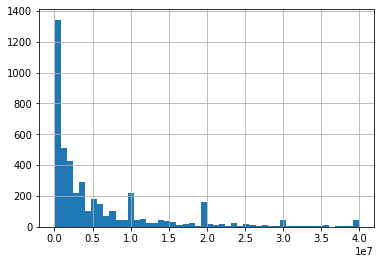

In [5]:
train_data['target'].hist(bins=50)

The target variable distribution is skewed. Majority of the datapints have a low value.

## Normalizing target variable

In [6]:
# train_data["target"] = np.log1p(train_data["target"])
# train_data['target'].hist(bins=50)

## Splitting the train dataset for training
70 - 30 split for training and validation data



In [7]:
# Select main columns to be used in training
main_cols = train_data.columns.difference(['ID', 'target'])
X = train_data[main_cols]
y = np.log1p(train_data['target'].values)

In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(3121, 4991)
(1338, 4991)


## Prediction
Continuous target prediction for the unprocessed data

### Metrics used
1. Train set score (R2)
2. Test set score (R2)
3. Mean Squared Error (MSE)
4. Root Mean Squared Error (RMSE)
5. Mean Absolute Error (MAE)
6. Mean Absolute Percentage Error (MAPE)
7. Number of features used

### How to interpret metrics
R2 score is supposed to be within the 0 to 1 range with 1 as perfect fit and zero as no linear relationship between dependent variables with the independent variables. Negative R2 score indicates very poor fit, worse than a horizontal line

### Baseline Model (Dummy Regressor)

Predicts a specified constant value

In [9]:
model_dr = DummyRegressor(strategy='median').fit(X_train, y_train)
Y_pred_lr = model_dr.predict(X_test)

print(f"constant: {model_dr.constant_}")

# Metrics
print(f"Train set score (R2): {model_dr.score(X_train, y_train)}")
print(f"Test set score (R2): {model_dr.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")

constant: [[14.60850353]]
Train set score (R2): -0.004237463124374452
Test set score (R2): -0.005391731381019005
Mean Squared Error (MSE): 2.9803442789898646
Root Mean Squared Error (RMSE): 1.7263673650152984
Mean Absolute Error (MAE): 1.410968919332563
Mean Absolute Percentage Error (MAPE): 0.10312097781199492


### 1. Linear Regression

In [10]:
model_LR = LinearRegression().fit(X_train, y_train)
Y_pred_lr = model_LR.predict(X_test)

print(f"intercept: {model_LR.intercept_}")
print(f"slope: {model_LR.coef_}")

# Metrics
print(f"Train set score (R2): {model_LR.score(X_train, y_train)}")
print(f"Test set score (R2): {model_LR.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")
print(f"No of features used: {np.sum(model_LR.coef_ != 0)} of {X_train.shape[1]}")

intercept: 14.724354904515328
slope: [  557.11801347   311.92490216 -1011.20916341 ...    18.82243224
   -16.74807244     9.03389478]
Train set score (R2): 0.9985813529770193
Test set score (R2): -2.3232246446389654e+19
Mean Squared Error (MSE): 6.886877087149994e+19
Root Mean Squared Error (RMSE): 8298721038.298609
Mean Absolute Error (MAE): 2264348761.300762
Mean Absolute Percentage Error (MAPE): 151629742.54560503
No of features used: 4852 of 4991


#### Results interpretation
The model has a train set score of 0.9991 which is close to 1. However, the test set score (R2 score) is negative which indicating that the model overfitting, which performs really badly on test data, hence the model fit is poor.

### 2. Ridge Regression

In [11]:
# Using default alpha of 1.0
model_ridge = Ridge().fit(X_train, y_train)
Y_pred_lr = model_ridge.predict(X_test)

print(f"intercept: {model_ridge.intercept_}")
print(f"slope: {model_ridge.coef_}")

# Metrics
print(f"Train set score (R2): {model_ridge.score(X_train, y_train)}")
print(f"Test set score (R2): {model_ridge.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")
print(f"No of features used: {np.sum(model_ridge.coef_ != 0)} of {X_train.shape[1]}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


intercept: 14.326322964164685
slope: [ 1.20696362e-05 -1.26843584e-05  0.00000000e+00 ... -3.55843358e-05
  1.15359642e-06  1.11662155e-04]
Train set score (R2): 0.9975662759515215
Test set score (R2): -31066474.73395973
Mean Squared Error (MSE): 92092256.51269597
Root Mean Squared Error (RMSE): 9596.47104474848
Mean Absolute Error (MAE): 4314.839847320654
Mean Absolute Percentage Error (MAPE): 293.7405523452647
No of features used: 4634 of 4991


#### Results interpretation (alpha 1.0)
- Poor fitting due to negative test R2
- Default alpha for the model was 1.0 which doesn't allow for much generalization

In [12]:
# Using alpha of 0.1
model_ridge = Ridge(alpha=0.1).fit(X_train, y_train)
Y_pred_lr = model_ridge.predict(X_test)

print(f"intercept: {model_ridge.intercept_}")
print(f"slope: {model_ridge.coef_}")

# Metrics
print(f"Train set score (R2): {model_ridge.score(X_train, y_train)}")
print(f"Test set score (R2): {model_ridge.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")
print(f"No of features used: {np.sum(model_ridge.coef_ != 0)} of {X_train.shape[1]}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


intercept: 14.151070687636897
slope: [-7.33609203e-05 -1.17344993e-05  0.00000000e+00 ...  3.73095285e-05
 -2.11822199e-05  1.53389712e-04]
Train set score (R2): 0.9976695086304705
Test set score (R2): -32650593.94953436
Mean Squared Error (MSE): 96788158.11404556
Root Mean Squared Error (RMSE): 9838.097281184282
Mean Absolute Error (MAE): 4469.5625680837675
Mean Absolute Percentage Error (MAPE): 304.4385796740708
No of features used: 4634 of 4991


#### Results interpretation (alpha 0.1)
- Model still performs poorly, but ever so slightly better than alpha 1.0

### 3. Lasso Regression

In [13]:
# Using default alpha of 1.0
model_lasso = Lasso().fit(X_train, y_train)
Y_pred_lr = model_lasso.predict(X_test)

print(f"intercept: {model_lasso.intercept_}")
print(f"slope: {model_lasso.coef_}")

# Metrics
print(f"Train set score (R2): {model_lasso.score(X_train, y_train)}")
print(f"Test set score (R2): {model_lasso.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")
print(f"No of features used: {np.sum(model_lasso.coef_ != 0)} of {X_train.shape[1]}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.457e+02, tolerance: 9.701e-01
  model = cd_fast.enet_coordinate_descent(


intercept: 13.46712035531311
slope: [ 8.65108058e-08  6.87974095e-08  0.00000000e+00 ... -1.53156783e-07
  1.50249228e-07 -1.92317305e-06]
Train set score (R2): 0.9098762879178384
Test set score (R2): -138902.82083916562
Mean Squared Error (MSE): 411761.1025099545
Root Mean Squared Error (RMSE): 641.6861401884527
Mean Absolute Error (MAE): 36.009782263324595
Mean Absolute Percentage Error (MAPE): 2.3280606097322982
No of features used: 4595 of 4991


#### Results interpretation (alpha 1.0)
Test set score is slightly lower than in ridge and linear regression models. The test set score has improved, but is still very poor

In [14]:
# Using alpha of 0.1
model_lasso = Lasso(alpha=0.1).fit(X_train, y_train)
Y_pred_lr = model_lasso.predict(X_test)

print(f"intercept: {model_lasso.intercept_}")
print(f"slope: {model_lasso.coef_}")

# Metrics
print(f"Train set score (R2): {model_lasso.score(X_train, y_train)}")
print(f"Test set score (R2): {model_lasso.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")
print(f"No of features used: {np.sum(model_lasso.coef_ != 0)} of {X_train.shape[1]}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.347e+02, tolerance: 9.701e-01
  model = cd_fast.enet_coordinate_descent(


intercept: 13.475234098268444
slope: [ 8.85197335e-08  6.54566503e-08  0.00000000e+00 ... -1.45074823e-07
  1.52031218e-07 -2.02849865e-06]
Train set score (R2): 0.9108012680792348
Test set score (R2): -622966.5185029258
Mean Squared Error (MSE): 1846700.7652990925
Root Mean Squared Error (RMSE): 1358.9336868659532
Mean Absolute Error (MAE): 75.39628279735905
Mean Absolute Percentage Error (MAPE): 4.805922350029982
No of features used: 4625 of 4991


In [15]:
# Using alpha of 10
model_lasso = Lasso(alpha=10, max_iter=10000).fit(X_train, y_train)
Y_pred_lr = model_lasso.predict(X_test)

print(f"intercept: {model_lasso.intercept_}")
print(f"slope: {model_lasso.coef_}")

# Metrics
print(f"Train set score (R2): {model_lasso.score(X_train, y_train)}")
print(f"Test set score (R2): {model_lasso.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")
print(f"No of features used: {np.sum(model_lasso.coef_ != 0)} of {X_train.shape[1]}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.961e+02, tolerance: 9.701e-01
  model = cd_fast.enet_coordinate_descent(


intercept: 13.341619703470698
slope: [3.47726769e-08 1.61613538e-07 0.00000000e+00 ... 4.33363113e-08
 4.31932156e-07 6.41630338e-08]
Train set score (R2): 0.9503557147938546
Test set score (R2): -1112.9238978928904
Mean Squared Error (MSE): 3302.0728266333963
Root Mean Squared Error (RMSE): 57.46366527322632
Mean Absolute Error (MAE): 23.677731683255782
Mean Absolute Percentage Error (MAPE): 1.6070997247271652
No of features used: 4316 of 4991


#### Results interpretation (alpha 0.1)
Changing alpha only marginally affected the performance. The effect is negligible.

### 4. SVM - Support Vector Machine

In [16]:
model_SVR = svm.SVR().fit(X_train, y_train)
Y_pred_lr = model_SVR.predict(X_test)

# Metrics
print(f"Train set score (R2): {model_SVR.score(X_train, y_train)}")
print(f"Test set score (R2): {model_SVR.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")

Train set score (R2): 0.3080177848628295
Test set score (R2): 0.13354743952918013
Mean Squared Error (MSE): 2.5684783860995255
Root Mean Squared Error (RMSE): 1.6026473055852075
Mean Absolute Error (MAE): 1.2891471761743543
Mean Absolute Percentage Error (MAPE): 0.09447523906987104


#### Results Interpretation
Both test and train set scores (R2) are negative indicating a poor model fit. However this is a significant improvement from linear ridge and lasso models.

### 5. Random Forest

In [17]:
model_RFR = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
Y_pred_lr = model_RFR.predict(X_test)

# Metrics
print(f"Train set score (R2): {model_RFR.score(X_train, y_train)}")
print(f"Test set score (R2): {model_RFR.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
# print(f"Root Mean Squared Log Error (RMSlE): {mean_squared_log_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")

Train set score (R2): 0.8702800303279894
Test set score (R2): 0.22999308094290516
Mean Squared Error (MSE): 2.2825786649768243
Root Mean Squared Error (RMSE): 1.510820527057011
Mean Absolute Error (MAE): 1.1788047507338668
Mean Absolute Percentage Error (MAPE): 0.08510907766617708


#### Results interpretation
Both the train and test set scores (R2) are within the accepted range of 0 to 1. The train set score is 0.85, which is high. However, the test set score is as low as 0.15 which indicates that the model is overfitted to the test data and does not have much room for generalization.

### 6. Gradient Boosting Regressor

In [18]:
model_GBR = GradientBoostingRegressor().fit(X_train, y_train)
Y_pred_lr = model_GBR.predict(X_test)

# Metrics
print(f"Train set score (R2): {model_GBR.score(X_train, y_train)}")
print(f"Test set score (R2): {model_GBR.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")

Train set score (R2): 0.4562773494396194
Test set score (R2): 0.23939165869443557
Mean Squared Error (MSE): 2.2547178853840393
Root Mean Squared Error (RMSE): 1.5015718049377589
Mean Absolute Error (MAE): 1.1990088539720043
Mean Absolute Percentage Error (MAPE): 0.08690178082506915


#### Results interpretation
Though the training set R2 score is lower than the Random Forest model, the test set R2 score is higher indicating less overfitting and more generalization. Overally, this model performs better than the ones above for this dataset.

### 7. MLP Regressor

In [19]:
model_mlpr = MLPRegressor(hidden_layer_sizes= (5,5,5,5),
                           max_iter=500, alpha=0.05, solver='sgd',
                           learning_rate='adaptive', activation='tanh').fit(X_train, y_train)
Y_pred_lr = model_mlpr.predict(X_test)

# Metrics
print(f"Train set score (R2): {model_mlpr.score(X_train, y_train)}")
print(f"Test set score (R2): {model_mlpr.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, Y_pred_lr, squared=False)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")

Train set score (R2): -0.0006437239825685115
Test set score (R2): -0.0016524003994027314
Mean Squared Error (MSE): 2.969259551166411
Root Mean Squared Error (RMSE): 1.7231539545746952
Mean Absolute Error (MAE): 1.4160103404892372
Mean Absolute Percentage Error (MAPE): 0.1026517252212522


In [20]:
print(f"Train set score (R2): {model_mlpr.score(X_train, y_train)}")
print(f"Test set score (R2): {model_mlpr.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, Y_pred_lr, squared=False)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lr)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lr)}")

Train set score (R2): -0.0006437239825685115
Test set score (R2): -0.0016524003994027314
Mean Squared Error (MSE): 2.969259551166411
Root Mean Squared Error (RMSE): 1.7231539545746952
Mean Absolute Error (MAE): 1.4160103404892372
Mean Absolute Percentage Error (MAPE): 0.1026517252212522


#### Results interpretation
This model performs poorly because of the negative train and test R2 scores. However, its performance is better than that off the linear, lasso and ridge models.

### LightGBM Regressor

In [21]:
model_lgbm = LGBMRegressor().fit(X_train, y_train)
Y_pred_lgbm = model_lgbm.predict(X_test)

# Metrics
print(f"Train set score (R2): {model_lgbm.score(X_train, y_train)}")
print(f"Test set score (R2): {model_lgbm.score(X_test, y_test)}")
mse = mean_squared_error(y_test, Y_pred_lgbm)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, Y_pred_lgbm, squared=False)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, Y_pred_lgbm)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, Y_pred_lgbm)}")

Train set score (R2): 0.7967856501884987
Test set score (R2): 0.2773477599030918
Mean Squared Error (MSE): 2.1422022901596858
Root Mean Squared Error (RMSE): 1.4636264175532245
Mean Absolute Error (MAE): 1.1450984681698757
Mean Absolute Percentage Error (MAPE): 0.0826503172255273


## Predicting The Test Dataset with our Star Model

In [22]:
# Make prediction on the test set
test_df = test_data[main_cols]
predictions = model_GBR.predict(test_df)

In [23]:
predictions

array([14.49137378, 14.42673106, 14.90617688, ..., 14.2764971 ,
       13.81820259, 14.42673106])